# Принятие решений в бизнесе

**Описание проекта**

В крупном интернет-магазине, совместно с отделом маркетинга подготовлен список из 9 гипотез для увеличения выручки.
Необходимо приоритизировать имеющиеся гипотезы, запустить A/B-тест и проанализировать результаты.
<a id='start'></a>

**План работы**

1. <a href='#step_1'>Приоритизация гипотез</a>
  * <a href='#step_1.1'>Зарузить данные</a>
  * <a href='#step_1.2'>Задача: Применить фреймворк ICE для приоритизации гипотез</a>
  * <a href='#step_1.3'>Задача: Применить фреймворк RICE для приоритизации гипотез</a>
  * <a href='#step_1.4'>Задача: Посмотреть, как изменилась приоритизация гипотез при применении RICE вместо ICE</a>


2. <a href='#step_2'>Анализ A/B-теста</a>  

  * <a href='#step_2.1'>Построить график кумулятивной выручки по группам</a>
  * <a href='#step_2.2'>Построить график кумулятивного среднего чека по группам</a>
  * <a href='#step_2.3'>Построить график относительного изменения кумулятивного среднего чека группы B к группе A</a>
  * <a href='#step_2.4'>Построить график кумулятивного среднего количества заказов на посетителя по группам</a>
  * <a href='#step_2.5'>Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a>
  * <a href='#step_2.6'>Построить точечный график количества заказов по пользователям</a>
  * <a href='#step_2.7'>Посчитать 95-й и 99-й перцентили количества заказов на пользователя</a>
  * <a href='#step_2.8'>Построить точечный график стоимостей заказов</a>  
  * <a href='#step_2.9'>Посчитать 95-й и 99-й перцентили стоимости заказов</a>  
  * <a href='#step_2.10'>Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a>
  * <a href='#step_2.11'>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным</a>
  * <a href='#step_2.12'>Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группамипо «очищенным» данным</a>    
  * <a href='#step_2.13'>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным</a>
  * <a href='#step_2.end'>Вывод  по результатам теста</a>
    
3. <a href='#step_3'>Общий вывод</a>

<a id="step_1"></a>
##  Приоритизация гипотез


In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt

<a id="step_1.1"></a>
###  Загрузить данные

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Файл /datasets/hypothesis.csv содержит: 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка * гипотезы.

Приведем название столбцов к нижнему регистру, для удобства

In [4]:
hypothesis.columns = [c.lower() for c in hypothesis.columns]
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Отобразим полное описание гипотез

In [5]:
pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
#Вернем все обратно, чтобы не загромождать таблицы

pd.reset_option('display',silent=True)


<a href='#start'>Вернуться к оглавлению</a>

<a id="step_1.2"></a>
###  Задача: Применить фреймворк ICE для приоритизации гипотез

In [7]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

print(hypothesis[['hypothesis','ice']].sort_values(by='ice',ascending=False))

                                          hypothesis    ice
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


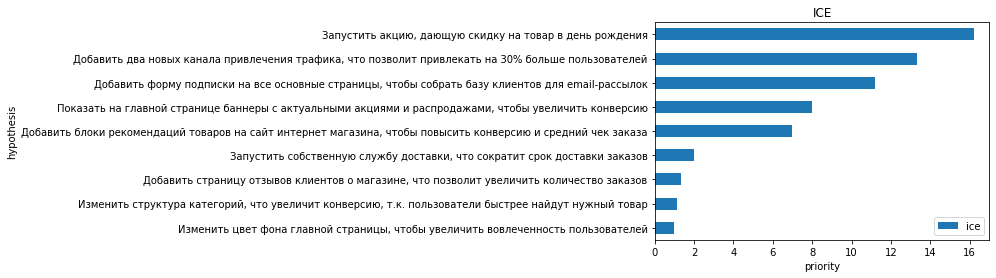

In [8]:
df = hypothesis[['hypothesis','ice']].set_index('hypothesis').sort_values(by='ice').plot(kind='barh')
df.set_xlabel('priority')
df.set_title('ICE')
plt.show()

Наиболее перспективные гипотезы по ICE:

* 8 - Запустить акцию, дающую скидку на товар в день рождения;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_1.3"></a>
###  Задача: Применить фреймворк RICE для приоритизации гипотез


In [9]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

print(hypothesis[['hypothesis','rice']].sort_values(by='rice',ascending=False))

                                          hypothesis   rice
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


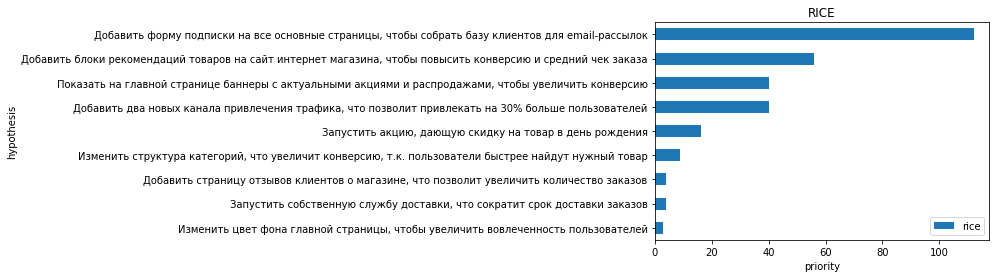

In [10]:
df_r = hypothesis[['hypothesis','rice']].set_index('hypothesis').sort_values(by='rice').plot(kind='barh')
df_r.set_xlabel('priority')
df_r.set_title('RICE')
plt.show()

Наиболее перспективные гипотезы по RICE:

* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_1.4"></a>
### Задача: Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE


In [11]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2


Сводная таблица по гипотезам:

|Приоритет по ICE  | Приоритет по RICE | 
|:----------------:|:----------------:|
|8    |   7        |
| 0         |  2|
| 7      |0|
|6    | 6      |
| 2 | 8   |

Приоритизация по методам отличается, так как метод RICE учитывает дополнительно охват пользователей.  
Из топа ушла 8 гипотеза, потому что параметр reach(охват пользователей) в гипотезе №8 равен 1, в то время как у других гипотез он больше. Гипотезы 7 и 2 поднялись из-за высокого показателя reach

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2"></a>
## Анализ A/B-теста

В файлах orders.csv и visitors.csv находятся результаты, после проведения A/B теста



In [12]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Файл /datasets/orders.csv  
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.



In [14]:
#Приведем все к нижнему регистру

orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [15]:
#Приведем даты к нужному формату
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [16]:
#Посмотрим на распределение по группам
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

У нас разное количество людей в группах, в группе B-640 чел,а  в группе А -557

In [17]:
visitors.info()
visitors.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Файл /datasets/visitors.csv  
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [18]:
#Приведем даты к нужному формату
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [19]:
#Проверим
orders.dtypes

transactionid             int64
visitorid                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [20]:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [21]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Записей в группе А и В одинаковое количество

In [22]:
#Посмотрим есть ли одинаковые пользователи в обеих группах
group_dubl = orders.pivot_table(index='visitorid', values='group', aggfunc='nunique')
group_dubl .reset_index()
group_dubl .query('group > 1').count()

group    58
dtype: int64

Есть пользователи, которые попали в обе группы теста одновременно -58 чел, возможно, это говорит об ошибке в сборе данных.   
Удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, так как там данные уже агрегированы за день.   
Соответственно не будем удалять пользователей, попавших в обе группы.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.1"></a>
### Построить график кумулятивной выручки по группам

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
        .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)
        .sort_values(by=['date','group'])
                   )

In [25]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
                     )

In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

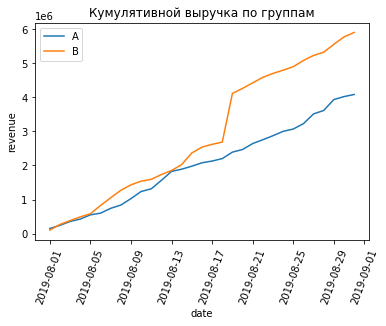

In [29]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивной выручка по группам')
plt.xticks(rotation=70)
plt.xlabel('date')
plt.ylabel('revenue')
plt.show()

**Вывод**

Выручка почти равномерно увеличивается в течение всего теста.  
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

В середине теста группа B вырвалась вперед и продолжает лидировать весь остаток теста. Возможно влияние аномально больших заказов, которые мы проанализируем позже.


<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.2"></a>
### Построить график кумулятивного среднего чека по группам

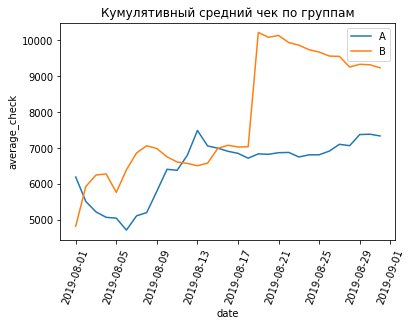

In [30]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=70)
plt.xlabel('date')
plt.ylabel('average_check')
plt.show()

**Вывод**

Кумулятивное значение среднего чека колеблется. Наблюдается резкий скачок ср.чека в группе "B" 17.08.2019 , он стал выше 10000. 
Для группы "А" пик был 13.08.2019 (7000-8000), после наблюдается спад.

Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов.



<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.3"></a>
### Построить график относительного изменения кумулятивного среднего чека группы B к группе A

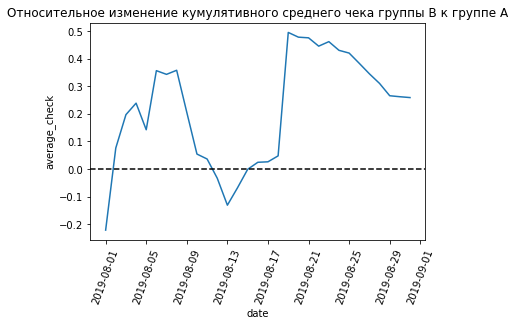

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                          )
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=70)
plt.xlabel('date')
plt.ylabel('average_check')
plt.show()

**Вывод**

Относительное изменение кумулятивного среднего чека группы B к группе A резко менялись в несколько дат. Видимо, тогда и были совершены аномальные заказы.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.4"></a>
### Построить график кумулятивного среднего количества заказов на посетителя по группам

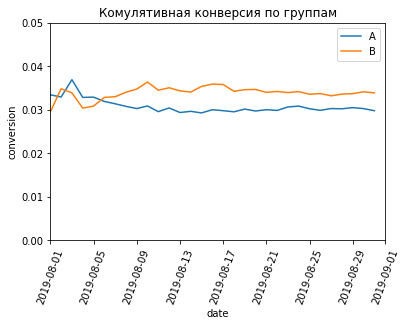

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.xticks(rotation=70)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.0, 0.05])
plt.title('Комулятивная конверсия по группам')
plt.xlabel('date')
plt.ylabel('conversion')
plt.show()

**Вывод** 

В начале теста группа А имела большую конверсию, но постепенно группа В вырвался вперед и зафиксировался примерно около одного значения, больше значения группы А.
Был изменен масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое. Если убрать масштаб осей, будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.5"></a>
### Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

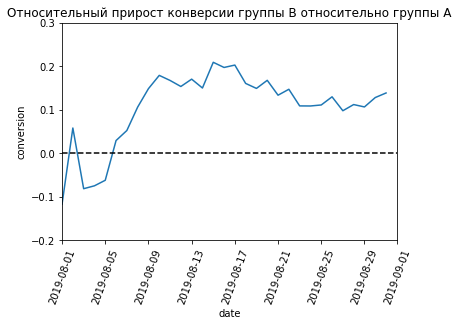

In [33]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                              ) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])
plt.xticks(rotation=70)
plt.xlabel('date')
plt.ylabel('conversion')
plt.show()

**Вывод** 

В начале теста группа B проигрывала группе A, затем вырвалась резко вперёд, а потом упала вновь. Затем она начала расти вплоть до 15 августа (прирост 20%), после чего стала немного падать до 0.1, но все равно выигрывает по сравнению с группой А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.6"></a>
### Построить точечный график количества заказов по пользователям

In [34]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.head()

,visitorid,transactionid
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


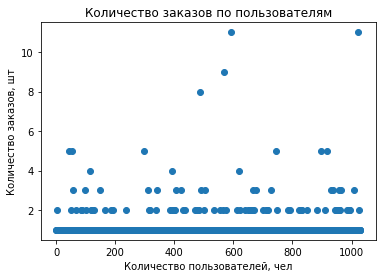

In [35]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionid'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей, чел')
plt.ylabel('Количество заказов, шт')
plt.show()

**Вывод**

В основном пользователи совершают 1-2 заказа.  
Пользователей, заказавших более 3 раз немного, они вполне могут быть аномальными. Принято отсеивать от 1% до 5% наблюдений с крайними значениями.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.7"></a>
### Посчитать 95-й и 99-й перцентили количества заказов на пользователя

Выбрать границу для определения аномальных пользователей.


In [36]:
np.percentile(ordersByUsers['transactionid'], [95, 99])

array([2., 4.])

**Вывод**

Не более 5% пользователей оформляли больше 2 заказов. И не более 1% заказывали больше 4.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 


<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.8"></a>
### Построить точечный график стоимостей заказов

In [37]:
orders.sort_values(by='revenue', ascending=False).head()

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


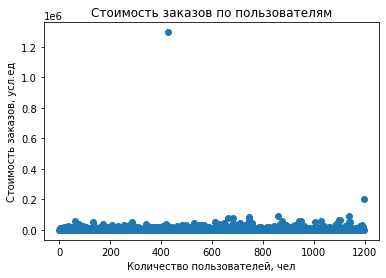

In [38]:
#Построим точечную диаграмму стоимости заказов на одного пользователя
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Количество пользователей, чел')
plt.ylabel('Стоимость заказов, усл.ед')
plt.show()

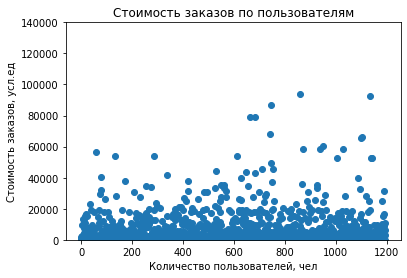

In [39]:
#Посмотрим поближе
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Количество пользователей, чел')
plt.ylabel('Стоимость заказов, усл.ед')
plt.ylim(0, 140000)
plt.show()


**Вывод**

Видны 2 отчетливых выброса, оба заказа из группы B - 1294500 и 202740, они и повлияли на резкий скачок данных в группе В.  
Основную массу заказов оформляют до 30000, посмотрим 95 и 99 перцентиль

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.9"></a>
### Посчитать 95-й и 99-й перцентили стоимости заказов
Выбрать границу для определения аномальных заказов


In [40]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

**Вывод**

Не более 5% пользователей оформляли заказы стоимостью больше 28000. И не более 1% заказывали дороже 58233.
Разумно выбрать цену стоимости заказа в 30 000 за верхнюю границу и отсеять аномальные величины по ней.


<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.10"></a>
### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов между группами нет.   
Альтернативная: различия в среднем между группами есть.

Для гипотезы применим непараметрический тест Уилкоксона-Манна-Уитни, так как в наших данных присутствуют выбросы и параметрические тесты сработают плохо.

In [41]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [42]:
visitorsACummulative =  cumulativeData[cumulativeData['group'] == 'A'][['date','visitors']]
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [43]:
visitorsBCummulative =  cumulativeData[cumulativeData['group'] == 'B'][['date','visitors']]
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [44]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


In [45]:
ordersACummulative = cumulativeData[cumulativeData['group'] == 'A'][['date','orders', 'revenue']]
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [46]:
ordersBCummulative = cumulativeData[cumulativeData['group'] == 'B'][['date','orders', 'revenue']]
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [47]:
data = (ordersADaily
    .merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


*Описание названия столбцов данных:*

* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [48]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.   
Тем, кто ничего не заказал, будут соответствовать нули. 

In [49]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [50]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
alpha = 0.05 

results = st.mannwhitneyu(sampleA, sampleB) 

print('p-значение: ', "{0:.3f}".format(results[1]))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.017
Отвергаем нулевую гипотезу: разница статистически значима


In [51]:
#Выведем относительный прирост среднего числа заказов группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


**Вывод** 

Полученный результат p-значения: 0.017 говорит о том, что с очень маленькой вероятностью такой результат(различий в среднем количестве заказов между группами нет) можно получить случайно, поэтому на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

Относительный прирост среднего числа заказов группы В к конверсии группы А равен 13.8%.



<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.11"></a>
### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет.   
Альтернативная гипотеза: различия в среднем чеке между группами есть.  

Для анализа также применим непараметрический тест Уилкоксона-Манна-Уитни

In [52]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
alpha = 0.05 

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results[1]))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [53]:
#найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


**Вывод**

Полученное p-значение: 0.729 говорит о том, что с вероятностью 72.9% такой результат(различий в среднем чеке между группами нет) можно получить случайно, поэтому на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

Относительное различие среднего чека между группами 25.9%,которое, вероятнее всего, обусловлено влиянием аномальных выбросов в группе В.


<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.12"></a>
### Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группамипо «очищенным» данным

Напомним, что найденные ранее 95-й и 99-й перцентили стоимости заказов равны 28000, 58233.2 усл.ед. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей.  Так мы уберём от 1-5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [54]:
# Сделаем срезы пользователей с числом заказов больше 3

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)


In [55]:
# Сделаем срезы пользователей совершивших заказы дороже 30 000 — usersWithExpensiveOrders
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']


In [56]:
#  Объединим их в таблице abnormalUsers
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [57]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64

In [58]:
#Узнаем, сколько всего аномальных пользователей
abnormalUsers.shape[0]

68

В нашей выборке было 1197 пользователей, аномальных получилось 68 пользователей, что составляет всего 5.7% от всей выборки,что считаем приемлимым и будем работать теперь с "очищенными" данными

In [59]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов между группами нет.   
Альтернативная: различия в среднем между группами есть.

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [60]:
alpha = 0.05 

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered) 

print('p-значение: ', "{0:.3f}".format(results[1]))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.013
Отвергаем нулевую гипотезу: разница статистически значима


In [61]:
#Выведем относительный прирост среднего числа заказов группы B
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.172


**Вывод**

Результаты по среднему количеству заказов практически не изменились. 
Было: p-значение:  0.017 и относительный прирост 13.8%
Стало: p-значение:  0.013 и относительный прирост 17.2%
Как и в случае с сырыми данными  мы отвергаем нулевую гипотезу в пользу альтернативной и группа В лучше группы А.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.13"></a>
### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.

Для анализа также применим непараметрический тест Уилкоксона-Манна-Уитни

In [62]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
alpha = 0.05 

results = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )


print('p-значение: ', "{0:.3f}".format(results[1]))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.720
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [63]:
#найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(
            orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
))

-0.023


**Вывод**

Было: p-значение:  0.729 и относительное различие среднего чека между группами 25.9%  
Стало:  p-значение:  0.720 и относительное различие среднего чека между группами -2.3%  
По "очищенным" данным у нас нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.  
После удаления аномальных значений средний чек группы B чуть ниже среднего чека группы A.

<a href='#start'>Вернуться к оглавлению</a>

<a id="step_2.end"></a>
### Вывод  по результатам теста


Результаты решенных нами задач:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A зафиксировались около среднего значения.
* График различия среднего чека в группе В показывает себя лучше, чем в группе А, но, в целом,отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.  После удаления аномальных значений различий в среднем чеке заказа между группами  не обнаружено.

Исходя из фактов выше следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Группа B статистически значимо лучше группы A по метрикам, а график конверсии говорит о фиксации результата.



<a href='#start'>Вернуться к оглавлению</a>

<a id="step_3"></a>
## Общий вывод

    В ходе работы мы приоритизировали имеющиеся гипотезы,  и проанализировать результаты А/В теста.

Задача 1. Приоритезация гипотез 

Из 9 гипотез методом ICE и RICE мы провели приоритезацию:

Гипотезы: 

|Номер гипотезы | Описание гипотезы|
|:----------------:|:----------------:|
|0	|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей|
|1	|Запустить собственную службу доставки, что сократит срок доставки заказов|
|2	|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа|
|3	|Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	|
|4	|Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	|
|5	|Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	|
|6	|Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	|
|7	|Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	|
|8	|Запустить акцию, дающую скидку на товар в день рождения	|

Результаты проверки: 

|Приоритет по ICE  | Приоритет по RICE | 
|:----------------:|:----------------:|
|8    |   7        |
| 0         |  2|
| 7      |0|
|6    | 6      |
| 2 | 8   |
    
Приоритизация по методам отличается, так как метод RICE учитывает дополнительно охват пользователей.
Из топа ушла 8 гипотеза, потому что параметр reach(охват пользователей) в гипотезе №8 равен 1, в то время как у других гипотез он больше. Гипотезы 7 и 2 поднялись из-за высокого показателя reach
   
   
Задача 2. Анализа А/В теста

* проанализировали наши данные и есть пользователи, которые попали в обе группы теста одновременно -58 чел, возможно, это говорит об ошибке в сборе данных. Так как удаление этих пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, так как там данные уже агрегированы за день.  Соответственно  мы не удаляли пользователей, попавших в обе группы.

* Посмотрели ближе результаты А/В теста и зафиксировали следующее:
   * в данных присутствуют аномальные значения, из за которых на графиках присутстсвую резкие скачки данных
   * комулятивный график по выручке показал, что в целом группа В лидирует по сравнению с группой А
   * комулятивный график по среднему чеку, показал резкий скачок ср.чека в группе "B" 17.08.2019 , он стал выше 10000. Для группы "А" пик был 13.08.2019 (7000-8000), после наблюдается спад.
   * Относительное изменение кумулятивного среднего чека группы B к группе A резко менялись в несколько дат. Видимо, тогда и были совершены аномальные заказы.
   * комулятивный график конверсии показал, что в  начале теста группа А имела большую конверсию, но постепенно группа В вырвался вперед и зафиксировался примерно около одного значения, больше значения группы А. В целом группа В показала себя лучше. чем группа А
   * В основном пользователи совершают 1-2 заказа. Не более 5% пользователей оформляли больше 2 заказов. И не более 1% заказывали больше 4
   * Основную массу заказов оформляют до 30000. Не более 5% пользователей оформляли заказы стоимостью больше 28000. И не более 1% заказывали дороже 58233. 

* Для гипотезы применили непараметрический тест Уилкоксона-Манна-Уитни, так как в наших данных присутствуют выбросы и параметрические тесты сработают плохо.

       1. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" и "очищенным" данным.
       
Нулевая: различий в среднем количестве заказов между группами нет.  
Альтернативная: различия в среднем между группами есть.  

*Результат по "сырым" данным*: p-значения: 0.017, относительный прирост среднего числа заказов группы В к конверсии группы А равен 13.8%. На уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативной.  
*Результат по "очищенным" данным*: р-значение: 0.013 и относительный прирост 17.2%. Как и в случае с сырыми данными мы отвергаем нулевую гипотезу в пользу альтернативной и группа В лучше группы А.


          2. Статистическая значимость различий в среднем чеке заказа между группами по "сырым" и "очищенным" данным
        
Нулевая гипотеза: различий в среднем чеке между группами нет.  
Альтернативная гипотеза: различия в среднем чеке между группами есть.  

*Результат по "сырым" данным*: p-значение: 0.729,относительное различие среднего чека между группами 25.9%,которое,  обусловлено влиянием аномальных выбросов в группе В.
На уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.  
*Результат по "очищенным" данным*: p-значение: 0.720 и относительное различие среднего чека между группами -2.3%  
По "очищенным" данным у нас нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.  
После удаления аномальных значений средний чек группы B чуть ниже среднего чека группы A.  

        
* Результаты решенных нами задач:

  * Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
  * По сырым и очищенным данным нет статистически значимого различия по среднему чеку между группами.
  * График различия конверсии между группами сообщает, что результаты группы B лучше группы A зафиксировались около среднего значения.
  * График различия среднего чека в группе В показывает себя лучше, чем в группе А, но, в целом, отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. После удаления аномальных значений различий в среднем чеке заказа между группами не обнаружено.   

Исходя из фактов выше следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы. Группа B статистически значимо лучше группы A по метрикам, а график конверсии говорит о фиксации результата.